source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [19]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename1 = 'dataframe.csv'
filename2 = 'dataframe_all_timestamps.csv'

df = pd.read_csv('dataframe.csv')
df_all_timestamps = pd.read_csv('dataframe_all_timestamps.csv')

In [2]:
import pandasql as ps
US = df.loc[df['country'] == 'US']
US.head()



,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
310,o78x918zbFk,2017-11-14,TOTAL FAIL! NATASHA DENONA HOLIDAY WTF,Tati,26,Howto & Style,2017-11-08,18:00:05,"YouTube|""Beauty""|""Makeup""|""Tutorial""|""Review""|...",1277364,56867,2148,25326,https://i.ytimg.com/vi/o78x918zbFk/default.jpg,False,False,False,This was the most UNEXPECTED WTF I've done so ...,US
311,6ixU_vdE0Es,2017-11-14,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,Madelaine Petsch,22,People & Blogs,2017-11-08,22:13:18,"madelaine|""madelainepetsch""|""madelaine petsch""...",280065,20289,38,939,https://i.ytimg.com/vi/6ixU_vdE0Es/default.jpg,False,False,False,I asked Travis to replicate my everyday makeup...,US
312,wRGldR_SQAA,2017-11-14,Apple Clips sample,Steve Kovach,22,People & Blogs,2017-11-09,18:01:04,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,US
313,agKDPntMv-E,2017-11-14,Stephen A. Smith slams the Philadelphia 76ers ...,ESPN,17,Sports,2017-11-08,15:59:06,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,1553,https://i.ytimg.com/vi/agKDPntMv-E/default.jpg,False,False,False,First Take's Stephen A. Smith slams the Philad...,US
314,Xl38SuxyrgM,2017-11-14,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...",LetsGoWarriors,17,Sports,2017-11-09,07:27:32,"DubNation|""Golden State Warriors""|""Golden Stat...",16305,147,13,47,https://i.ytimg.com/vi/Xl38SuxyrgM/default.jpg,False,False,False,Previous video: Draymond postgame https://yout...,US


In [3]:
q1 = """SELECT title, likes, tags  FROM US limit 10"""

print(ps.sqldf(q1, locals()))

                                               title  likes  \
0             TOTAL FAIL! NATASHA DENONA HOLIDAY WTF  56867   
1        BOYFRIEND DOES MY MAKEUP | Madelaine Petsch  20289   
2                                 Apple Clips sample      0   
3  Stephen A. Smith slams the Philadelphia 76ers ...   4037   
4  STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...    147   
5  World's first self-driving shuttle crashes on ...     57   
6      Kids Describe America to Koji the Illustrator   5684   
7   Impossible Active Audio Noise Cancelling by Muzo  29990   
8  How To Do Thanksgiving Makeup That Has Nothing...   8388   
9                Phillip Phillips - Magnetic (Audio)   2195   

                                                tags  
0  YouTube|"Beauty"|"Makeup"|"Tutorial"|"Review"|...  
1  madelaine|"madelainepetsch"|"madelaine petsch"...  
2                                             [none]  
3  espn|"espn live"|"first take"|"first take espn...  
4  DubNation|"Golden State Warr

In [4]:
q1 = """SELECT title, likes, tags  FROM US ORDER by likes DESC limit 10"""

print(ps.sqldf(q1, locals()))

                                               title    likes  \
0  BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...  2700800   
1                                        we broke up  2032463   
2                      VENOM - Official Trailer (HD)  1295189   
3                  Demi Lovato - Tell Me You Love Me  1251825   
4                                LOGAN PAUL IS BACK!  1216340   
5  [CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...  1141726   
6                       Red Velvet 레드벨벳 'Bad Boy' MV  1072246   
7  Ed Sheeran - Perfect Symphony (with Andrea Boc...  1025895   
8             Real Life Trick Shots 2 | Dude Perfect  1017919   
9           Selena Gomez - Back To You (Lyric Video)   922355   

                                                tags  
0          BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"  
1  lizzza|"lizza"|"liza"|"koshy"|"david"|"dobrik"...  
2  Venom|"Venom Movie"|"Venom (2018)"|"Marvel"|"M...  
3  Demi Lovato|"Tell Me You Love Me"|"Jesse Willi...  
4  logan 

In [14]:
usdf = ps.sqldf(q1, locals())
usdf.head()


,title,likes,tags,category
0,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,2700800,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",Music
1,we broke up,2032463,"lizzza|""lizza""|""liza""|""koshy""|""david""|""dobrik""...",People & Blogs
2,VENOM - Official Trailer (HD),1295189,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",Entertainment
3,Demi Lovato - Tell Me You Love Me,1251825,"Demi Lovato|""Tell Me You Love Me""|""Jesse Willi...",Music
4,LOGAN PAUL IS BACK!,1216340,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",Entertainment


In [6]:
US = df.loc[df['country'] == 'US']
q1 = """SELECT title,likes, tags, category  FROM US ORDER by likes  DESC limit 49"""
usdf = ps.sqldf(q1, locals())
usdf

,title,likes,tags,category
0,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,2700800,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",Music
1,we broke up,2032463,"lizzza|""lizza""|""liza""|""koshy""|""david""|""dobrik""...",People & Blogs
2,VENOM - Official Trailer (HD),1295189,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",Entertainment
3,Demi Lovato - Tell Me You Love Me,1251825,"Demi Lovato|""Tell Me You Love Me""|""Jesse Willi...",Music
4,LOGAN PAUL IS BACK!,1216340,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",Entertainment
5,[CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...,1141726,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",Music
6,Red Velvet 레드벨벳 'Bad Boy' MV,1072246,"Red Velvet|""레드벨벳""|""Bad Boy""|""The Perfect Red V...",Music
7,Ed Sheeran - Perfect Symphony (with Andrea Boc...,1025895,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",Music
8,Real Life Trick Shots 2 | Dude Perfect,1017919,"dude perfect|""dude perfect stereotypes""|""dude ...",Sports
9,Selena Gomez - Back To You (Lyric Video),922355,"selena gomez|""13 reasons why""|""back to you""|""s...",Film & Animation


In [7]:
usdf.shape

(49, 4)

In [8]:
US = df.loc[df['country'] == 'US']
q1 = """SELECT title,likes, tags, category  FROM US ORDER by likes  DESC limit 1000"""
usdf = ps.sqldf(q1, locals())
usdf

,title,likes,tags,category
0,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,2700800,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",Music
1,we broke up,2032463,"lizzza|""lizza""|""liza""|""koshy""|""david""|""dobrik""...",People & Blogs
2,VENOM - Official Trailer (HD),1295189,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",Entertainment
3,Demi Lovato - Tell Me You Love Me,1251825,"Demi Lovato|""Tell Me You Love Me""|""Jesse Willi...",Music
4,LOGAN PAUL IS BACK!,1216340,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",Entertainment
...,...,...,...,...
995,"Lilly Singh on YouTube, The Rock & Her Parents",42501,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",Entertainment
996,70 People from 70 Countries Sing Their Country...,42447,"national anthem|""anthem""|""canadian national an...",Travel & Events
997,Bob Saget Hiccups Uncontrollably While Eating ...,42380,"bob saget|""hot ones""|""sean evans""|""spicy wings...",Howto & Style
998,Smartphone DURABILITY Awards 2017!,42326,"SmartPhone awards|""smartphone durability award...",Howto & Style


In [9]:
usdf.shape

(1000, 4)

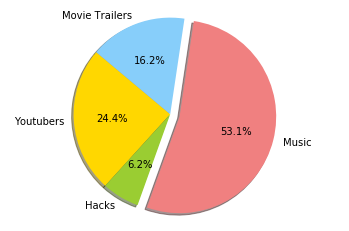

In [10]:
# Data to plot
labels = 'Youtubers', 'Hacks', 'Music', 'Movie Trailers'
sizes = [195, 50, 425, 130]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()



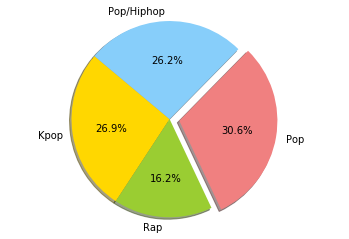

In [11]:
# Music Data to plot - all has to do with music
labels = 'Kpop', 'Rap', 'Pop', 'Pop/Hiphop'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [12]:
SELECT 'pop'
FROM tag

SyntaxError: invalid syntax (<ipython-input-12-ac0a1c238dba>, line 1)

In [ ]:
#bar plot code
#counts = usdf['country'].value_counts()
#fig = plot.figure(figsize = (10,10))
#ax = fig.gca()
#counts.plot.bar(ax = ax)
#ax.set_title('US YouTube trending secret formula')
#ax.set_xlabel('Tranding Characteristics')
#ax.set_ylabel('Popularity')

#scatterplot code
#usda.plot(kind='scatter', x='RangeIndex', y='RangeIndex')

In [16]:
MUSIC = usdf[usdf['category'].isin(['Music'])]
q2 = """SELECT *  FROM MUSIC ORDER by likes  DESC limit 1000"""
mudf = ps.sqldf(q2, locals())
mudf


,title,likes,tags,category
0,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,2700800,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",Music
1,Demi Lovato - Tell Me You Love Me,1251825,"Demi Lovato|""Tell Me You Love Me""|""Jesse Willi...",Music
2,[CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...,1141726,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",Music
3,Red Velvet 레드벨벳 'Bad Boy' MV,1072246,"Red Velvet|""레드벨벳""|""Bad Boy""|""The Perfect Red V...",Music
4,Ed Sheeran - Perfect Symphony (with Andrea Boc...,1025895,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",Music
...,...,...,...,...
159,Dan + Shay - Speechless (Wedding Video),45128,"wedding video|""heartfelt wedding video""|""emoti...",Music
160,Camila Cabello - Havana ( cover by Big Marvel ),45076,"Camila Cabello|""Havana""|""big marvel""",Music
161,Lauv - Paris in the Rain [Official Video],44085,"LAUV|""PARIS IN THE RAIN""|""EASY LOVE""|""THE OTHE...",Music
162,Where’s Maria? (Liberation by Christina Aguilera),43785,"Christina Aguilera|""Accelerate""|""Xtina""|""Ty Do...",Music


In [ ]:
mudf.shape

AttributeError: 'tuple' object has no attribute 'plot'

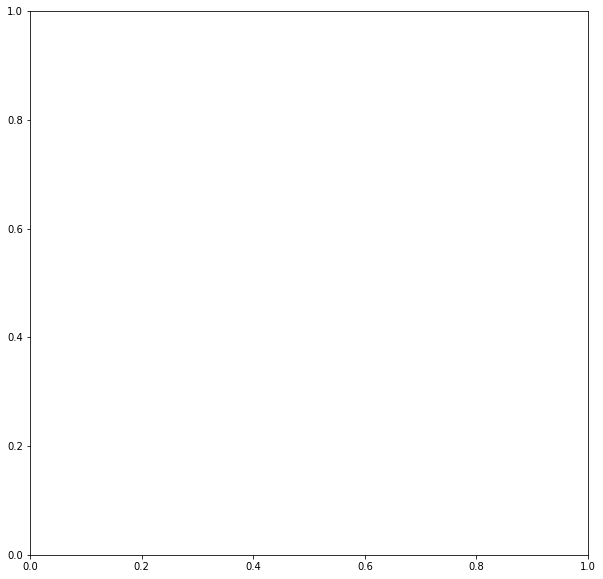

In [22]:
#bar plot code
counts = mudf['category'].value_counts(),
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
counts.plot.bar(ax = ax)
ax.set_title('US YouTube trending secret formula')
ax.set_xlabel('US')
ax.set_ylabel('likes')

In [ ]:
ENTERTAINMENT = usdf[usdf['category'].isin(['Entertainment'])]
q3 = """SELECT *  FROM ENTERTAINMENT ORDER by likes  DESC limit 1000"""
entdf = ps.sqldf(q3, locals())
entdf

In [ ]:
entdf.shape

In [ ]:
SPORTS = usdf[usdf['category'].isin(['Sports'])]
q4 = """SELECT *  FROM SPORTS ORDER by likes  DESC limit 1000"""
spdf = ps.sqldf(q4, locals())
spdf

In [ ]:
spdf.shape

In [ ]:
COMEDY = usdf[usdf['category'].isin(['Comedy'])]
q5 = """SELECT *  FROM COMEDY ORDER by likes  DESC limit 1000"""
cydf = ps.sqldf(q5, locals())
cydf

In [ ]:
cydf.shape

In [ ]:
PEOPLE_BLOGS = usdf[usdf['category'].isin(['People & Blogs'])]
q6 = """SELECT *  FROM PEOPLE_BLOGS ORDER by likes  DESC limit 1000"""
pbdf = ps.sqldf(q6, locals())
pbdf

In [ ]:
pbdf.shape

In [ ]:
df.info()

In [ ]:
FILM_ANIME = usdf[usdf['category'].isin(['Film & Animation'])]
q7 = """SELECT *  FROM FILM_ANIME ORDER by likes  DESC limit 1000"""
fadf = ps.sqldf(q7, locals())
fadf

In [ ]:
fadf.shape

In [ ]:
GAMING = usdf[usdf['category'].isin(['Gaming'])]
q8 = """SELECT *  FROM GAMING ORDER by likes  DESC limit 1000"""
gdf = ps.sqldf(q8, locals())
gdf

In [ ]:
gdf.shape

In [ ]:
HOW_TO_STYLE = usdf[usdf['category'].isin(['Howto & Style'])]
q9 = """SELECT *  FROM HOW_TO_STYLE ORDER by likes  DESC limit 1000"""
htsdf = ps.sqldf(q9, locals())
htsdf

In [ ]:
htsdf.shape

In [ ]:
TRAVEL_EVENTS = usdf[usdf['category'].isin(['Travel & Events'])]
q10 = """SELECT *  FROM TRAVEL_EVENTS ORDER by likes  DESC limit 1000"""
tedf = ps.sqldf(q10, locals())
tedf

In [ ]:
tedf.shape

In [ ]:
df_all_timestamps.info()